For the trunk system with 16 links, we swept over different model schedules, step size schedules and horizon lengths. The resulting pareto frontiers for different approaches can be visualized in this notebook.

In [1]:
import os
import sys
import pickle
from utils_shared import get_dir
from trunk.plotting_utils_trajectory_tracking import create_pareto_frontier_outline_plot, has_point_mass_model, fixed_step
import os, sys, pickle, importlib.util
from utils_shared import get_dir

Load results

In [2]:
# Make sure the trunk mpc classes are found for data loading
trunk_dir = get_dir("src/trunk")                           # absolute “…/src/trunk”
module_file = os.path.join(trunk_dir, "trunk_mpc_2d_acados.py")

if not os.path.isfile(module_file):
    raise FileNotFoundError(f"Cannot locate {module_file}")

# If the normal import still fails, load the file manually:
try:
    import trunk_mpc_2d_acados  # noqa: F401  (try the easy way first)
except ModuleNotFoundError:
    spec = importlib.util.spec_from_file_location("trunk_mpc_2d_acados", module_file)
    trunk_mpc_2d_acados = importlib.util.module_from_spec(spec)        # type: ignore
    sys.modules["trunk_mpc_2d_acados"] = trunk_mpc_2d_acados
    spec.loader.exec_module(trunk_mpc_2d_acados) 

# load the data
data_dir = get_dir("data/trunk")
results_file = os.path.join(data_dir, "results_16_link_oval_aggregated.pkl")

with open(results_file, "rb") as f:
    results = pickle.load(f)

Plot the pareto frontiers of different approaches without condensing

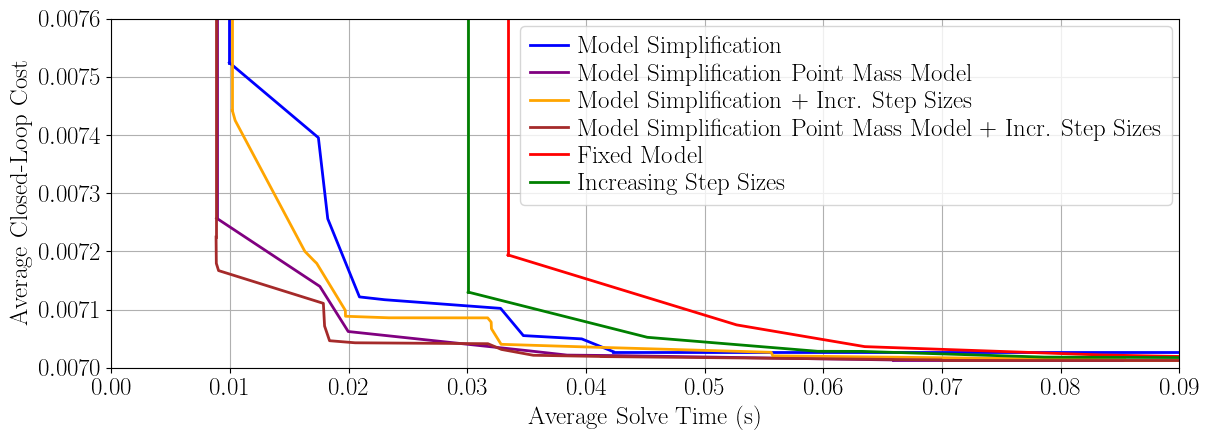

In [3]:
# Note that PARTIAL_CONDENSING_HPIPM with default settings does not use condensing at all
filters = [
    (lambda opts: len(opts.N_list) >= 2 and fixed_step(opts) and not has_point_mass_model(opts) and (opts.qp_solver == 'PARTIAL_CONDENSING_HPIPM'), 'blue', 'Model Simplification'),
    (lambda opts: len(opts.N_list) >= 2 and fixed_step(opts) and has_point_mass_model(opts) and (opts.qp_solver == 'PARTIAL_CONDENSING_HPIPM'), 'purple', 'Model Simplification Point Mass Model'),
    (lambda opts: len(opts.N_list) >= 2 and not fixed_step(opts) and not has_point_mass_model(opts) and (opts.qp_solver == 'PARTIAL_CONDENSING_HPIPM'), 'orange', 'Model Simplification + Incr. Step Sizes'),
    (lambda opts: len(opts.N_list) >= 2 and not fixed_step(opts) and has_point_mass_model(opts) and (opts.qp_solver == 'PARTIAL_CONDENSING_HPIPM'), 'brown', 'Model Simplification Point Mass Model + Incr. Step Sizes'),
    (lambda opts: (len(opts.N_list) == 1) and fixed_step(opts) and (opts.qp_solver == 'PARTIAL_CONDENSING_HPIPM'), 'red', 'Fixed Model'),
    (lambda opts: (len(opts.N_list) == 1) and not fixed_step(opts) and (opts.qp_solver == 'PARTIAL_CONDENSING_HPIPM'), 'green', 'Increasing Step Sizes'),
]

filename = "pareto_halfspace.pdf"
create_pareto_frontier_outline_plot(results, filter_conditions=filters, time_per_iter=False, filename=filename, legend=True)

Next with condensing

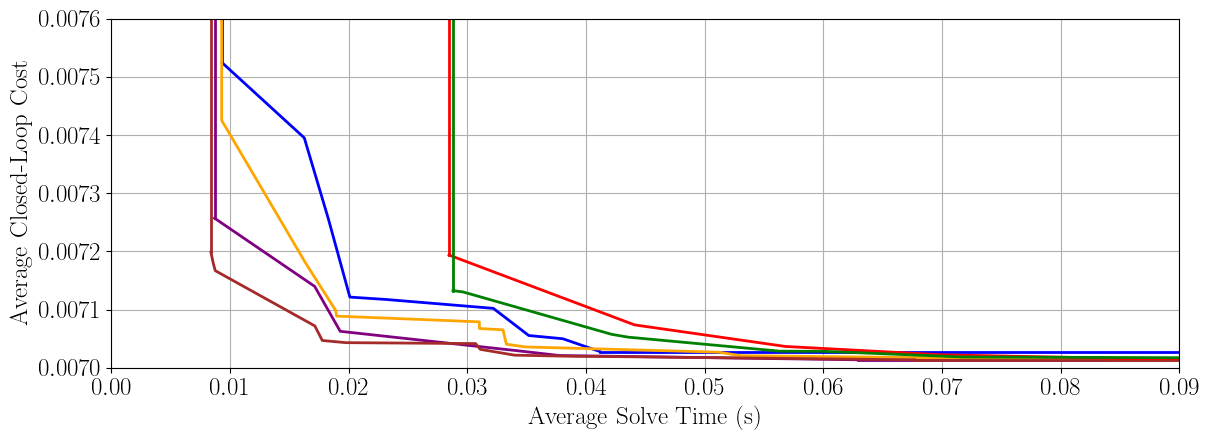

In [4]:
filters = [
    (lambda opts: len(opts.N_list) >= 2 and fixed_step(opts) and not has_point_mass_model(opts) and (opts.qp_solver == 'FULL_CONDENSING_HPIPM'), 'blue', 'Model Simplification'),
    (lambda opts: len(opts.N_list) >= 2 and fixed_step(opts) and has_point_mass_model(opts) and (opts.qp_solver == 'FULL_CONDENSING_HPIPM'), 'purple', 'Model Simplification Point Mass Model'),
    (lambda opts: len(opts.N_list) >= 2 and not fixed_step(opts) and not has_point_mass_model(opts) and (opts.qp_solver == 'FULL_CONDENSING_HPIPM'), 'orange', 'Model Simplification + Incr. Step Sizes'),
    (lambda opts: len(opts.N_list) >= 2 and not fixed_step(opts) and has_point_mass_model(opts) and (opts.qp_solver == 'FULL_CONDENSING_HPIPM'), 'brown', 'Model Simplification Point Mass Model + Incr. Step Sizes'),
    (lambda opts: (len(opts.N_list) == 1) and fixed_step(opts) and (opts.qp_solver == 'FULL_CONDENSING_HPIPM'), 'red', 'Fixed Model'),
    (lambda opts: (len(opts.N_list) == 1) and not fixed_step(opts) and (opts.qp_solver == 'FULL_CONDENSING_HPIPM'), 'green', 'Increasing Step Sizes'),
]

filename = "pareto_halfspace_condensed.pdf"
create_pareto_frontier_outline_plot(results, filter_conditions=filters, time_per_iter=False, filename=filename)